In [34]:
import numpy as np
import pandas as pd

In [35]:
data=pd.read_csv('iris.csv')

In [36]:
print(data.head())
print(len(data))

   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
150


In [37]:
data['class'][70]

'Iris-versicolor'

In [38]:
# Preprocessing
for i in range(len(data)):
    if data['class'][i]== 'Iris-setosa':
       data['class'][i]=int(0)
    elif data['class'][i]=='Iris-versicolor':
       data['class'][i]=int(1)
    else:
      data['class'][i]=int(2)
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
data[50:70]

,sepallength,sepalwidth,petallength,petalwidth,class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [41]:
# 3 Classes-> 1-Iris-setosa 2- Iris-versicolor 3- Iris-virginica  and 4 features 

In [42]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

seed(1)
network = initialize_network(4, 5, 3) # 4 feature vector as input-> hidden layer assumed 5 and output is 3 class-1,2,3
for i in range(len(network[0])):
 print(network[0][i])
 print('\n')
print('\n')
for i in range(len(network[1])):
 print(network[1][i])
 print('\n')
    
    
for layer in network:
    for neuron in layer:
        print(np.shape(neuron['weights']))
        break 
    break     

{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095]}


{'weights': [0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631]}


{'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942, 0.0021060533511106927, 0.4453871940548014]}


{'weights': [0.7215400323407826, 0.22876222127045265, 0.9452706955539223, 0.9014274576114836, 0.030589983033553536]}


{'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243, 0.21659939713061338]}




{'weights': [0.4221165755827173, 0.029040787574867943, 0.22169166627303505, 0.43788759365057206, 0.49581224138185065, 0.23308445025757263]}


{'weights': [0.2308665415409843, 0.2187810373376886, 0.4596034657377336, 0.28978161459048557, 0.021489705265908876, 0.8375779756625729]}


{'weights': [0.5564543226524334, 0.6422943629324456, 0.1859062658947177, 0.9925434121760651, 0.8599465287952899, 0.1208899598058

In [43]:
#So At Hidden Layer-> 5X1 4 input+ 1 bias itself is a vector which is 1 value per neuron
# Also at output ->  6X1 5 input+ 1 bias

In [44]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1] # Bias array's last value
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# test forward propagation
row = [5.1,3.5,1.4,0.2] #-> Class 1
output = forward_propagate(network, row)
print(output)
for i in range(len(network[0])):
 print(network[0][i])
 print('\n')
print('\n')
for i in range(len(network[1])):
 print(network[1][i])
 print('\n')
    

[0.8609707596285303, 0.8864146251436507, 0.9653897098698256]
{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095], 'output': 0.9948674611445971}


{'weights': [0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631], 'output': 0.996745029933176}


{'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942, 0.0021060533511106927, 0.4453871940548014], 'output': 0.9993181966765046}


{'weights': [0.7215400323407826, 0.22876222127045265, 0.9452706955539223, 0.9014274576114836, 0.030589983033553536], 'output': 0.9975635563036737}


{'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243, 0.21659939713061338], 'output': 0.9742282482444028}




{'weights': [0.4221165755827173, 0.029040787574867943, 0.22169166627303505, 0.43788759365057206, 0.49581224138185065, 0.23308445025757263], 'output': 0.8609707596285303}


{'weights': [0.230866541540

In [45]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):  # len(network)=2 i=1, i=0
		layer = network[i]                    # network[1] 3X5 matrix of weights
		errors = list()                        
		if i != len(network)-1:                
			for j in range(len(layer)):        # for network 0       
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):  # network[1]  -> len(layer)=3, j=0,1,2
				neuron = layer[j]           # layer[0]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):  # j=0,1
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# test backpropagation of error

expected = [0, 0,3]
backward_propagate_error(network, expected)
for layer in network:
    for neuron in layer:
        print(neuron)
        print('\n')
    break
    

{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614, 0.2550690257394217, 0.49543508709194095], 'output': 0.9948674611445971, 'delta': -0.00013418278548278968}


{'weights': [0.4494910647887381, 0.651592972722763, 0.7887233511355132, 0.0938595867742349, 0.02834747652200631], 'output': 0.996745029933176, 'delta': 6.860364581729077e-05}


{'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942, 0.0021060533511106927, 0.4453871940548014], 'output': 0.9993181966765046, 'delta': -3.490326804112069e-05}


{'weights': [0.7215400323407826, 0.22876222127045265, 0.9452706955539223, 0.9014274576114836, 0.030589983033553536], 'output': 0.9975635563036737, 'delta': -8.545428823696223e-06}


{'weights': [0.0254458609934608, 0.5414124727934966, 0.9391491627785106, 0.38120423768821243, 0.21659939713061338], 'output': 0.9742282482444028, 'delta': 0.0001367049811952283}




In [46]:
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']

In [67]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
 error=[]
 for epoch in range(n_epoch):
  sum_error = 0
  for row in train:
   outputs = forward_propagate(network, row)
   expected = [0 for i in range(n_outputs)]
   expected[row[-1]] = 1
   sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
   backward_propagate_error(network, expected)
   update_weights(network, row, l_rate)
  error.append(sum_error)
   #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 return error  

In [68]:
expected = [0 for i in range(n_outputs)]
expected


[0, 0, 0]

In [69]:
dataset=list()
for i in range(len(data)):
    dataset.append(list(data.iloc[i]))
dataset

[[5.1, 3.5, 1.4, 0.2, 0],
 [4.9, 3.0, 1.4, 0.2, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [4.6, 3.1, 1.5, 0.2, 0],
 [5.0, 3.6, 1.4, 0.2, 0],
 [5.4, 3.9, 1.7, 0.4, 0],
 [4.6, 3.4, 1.4, 0.3, 0],
 [5.0, 3.4, 1.5, 0.2, 0],
 [4.4, 2.9, 1.4, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [5.4, 3.7, 1.5, 0.2, 0],
 [4.8, 3.4, 1.6, 0.2, 0],
 [4.8, 3.0, 1.4, 0.1, 0],
 [4.3, 3.0, 1.1, 0.1, 0],
 [5.8, 4.0, 1.2, 0.2, 0],
 [5.7, 4.4, 1.5, 0.4, 0],
 [5.4, 3.9, 1.3, 0.4, 0],
 [5.1, 3.5, 1.4, 0.3, 0],
 [5.7, 3.8, 1.7, 0.3, 0],
 [5.1, 3.8, 1.5, 0.3, 0],
 [5.4, 3.4, 1.7, 0.2, 0],
 [5.1, 3.7, 1.5, 0.4, 0],
 [4.6, 3.6, 1.0, 0.2, 0],
 [5.1, 3.3, 1.7, 0.5, 0],
 [4.8, 3.4, 1.9, 0.2, 0],
 [5.0, 3.0, 1.6, 0.2, 0],
 [5.0, 3.4, 1.6, 0.4, 0],
 [5.2, 3.5, 1.5, 0.2, 0],
 [5.2, 3.4, 1.4, 0.2, 0],
 [4.7, 3.2, 1.6, 0.2, 0],
 [4.8, 3.1, 1.6, 0.2, 0],
 [5.4, 3.4, 1.5, 0.4, 0],
 [5.2, 4.1, 1.5, 0.1, 0],
 [5.5, 4.2, 1.4, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [5.0, 3.2, 1.2, 0.2, 0],
 [5.5, 3.5, 1.3, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [4.4, 3.0, 

Error: 4.895950135586656


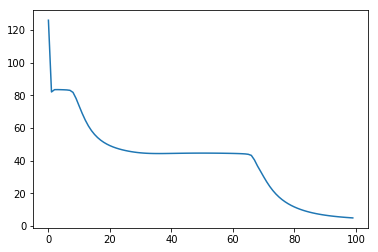

In [95]:
import matplotlib.pyplot as plt
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 5, n_outputs)
error=train_network(network, dataset, 0.1, 100, n_outputs)
#for layer in network:
#	print(layer)
plt.plot(error)
print('Error:',error[-1])

Error: 2.143654591172658


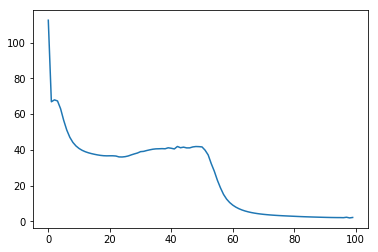

In [97]:
import matplotlib.pyplot as plt
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 5, n_outputs)
error=train_network(network, dataset, 0.2, 100, n_outputs)
#for layer in network:
#	print(layer)
plt.plot(error)
print('Error:',error[-1])

Error: 1.041971564497183


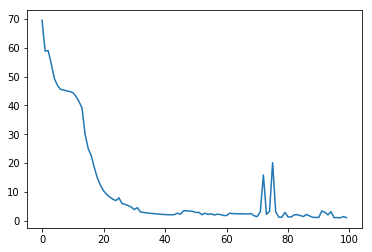

In [99]:
import matplotlib.pyplot as plt
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 5, n_outputs)
error=train_network(network, dataset, 0.3, 100, n_outputs)
#for layer in network:
#	print(layer)
plt.plot(error)
print('Error:',error[-1])

Error: 7.251473209702905


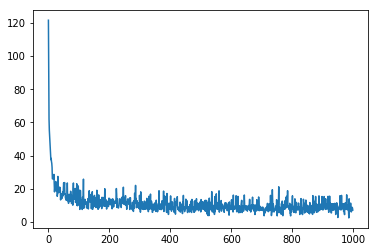

In [134]:
import matplotlib.pyplot as plt
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 5, n_outputs)
error=train_network(network, dataset, 0.4, 1000, n_outputs)
#for layer in network:
#	print(layer)
plt.plot(error)
print('Error:',error[-1])

In [146]:
print('Weights from input layer to hidden layer :')  
print('\n')
for i in range(len(network[0])):
  
 print(network[0][i])
 print('\n')
print('\n')
print('Weights from hidden layer to output layer :')
print('\n')
for i in range(len(network[1])):
    
 print(network[1][i])
 print('\n')

Weights from input layer to hidden layer :


{'weights': [-19.346454570559263, -22.587805706834203, 32.10292637114691, 33.48882866370681, -26.447036581172757], 'output': 0.9999793847656843, 'delta': -2.1113365862846527e-09}


{'weights': [0.3465624197204605, 0.751127008846057, 0.8604603384503742, 0.5453761347732755, 0.2877698781111391], 'output': 0.9999763058134259, 'delta': 6.189391033092653e-07}


{'weights': [0.5581935083660143, 2.3794158528875067, -4.02603715674725, -1.8071368142884559, 0.7179576815252615], 'output': 2.9211737296206668e-06, 'delta': -2.505590027760478e-06}


{'weights': [0.784977213962614, 0.7067143891114466, 0.23846268958112415, 0.997919877374112, 0.15630802273646144], 'output': 0.9999873119953709, 'delta': 3.252252416679733e-07}


{'weights': [0.7677348954806149, 0.7938058303154782, 0.2997868048788545, 0.7199558332783007, 0.1275580805394025], 'output': 0.999984436056279, 'delta': 5.531864487342133e-07}




Weights from hidden layer to output layer :


{'weights':

In [103]:
# prediction on first 5 examples
pred_data=dataset[0:5]
pred_data


[[5.1, 3.5, 1.4, 0.2, 0],
 [4.9, 3.0, 1.4, 0.2, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [4.6, 3.1, 1.5, 0.2, 0],
 [5.0, 3.6, 1.4, 0.2, 0]]

In [113]:
row = [5.1,3.5,1.4,0.2] #-> Class 0
output = forward_propagate(network, row)
if output.index(max(output))==0:
    print('True Prediciton')
else:
    print('False Prediction')

True Prediciton


In [117]:
row = [6.9,3.1,5.4,2.1] #-> Class 2
output = forward_propagate(network, row)
if output.index(max(output))==2:
    print('True Prediciton')
else:
    print('False Prediction')

True Prediciton


In [118]:
row = [6.5,2.8,4.6,1.5] #-> Class 1
output = forward_propagate(network, row)
if output.index(max(output))==1:
    print('True Prediciton')
else:
    print('False Prediction')

False Prediction


In [122]:
from random import shuffle
shuffle(dataset)

In [123]:
dataset

[[5.5, 2.4, 3.8, 1.1, 1],
 [4.9, 3.1, 1.5, 0.1, 0],
 [4.8, 3.0, 1.4, 0.1, 0],
 [6.0, 2.2, 5.0, 1.5, 2],
 [5.6, 2.8, 4.9, 2.0, 2],
 [5.5, 4.2, 1.4, 0.2, 0],
 [5.7, 2.8, 4.1, 1.3, 1],
 [5.6, 2.7, 4.2, 1.3, 1],
 [5.1, 3.4, 1.5, 0.2, 0],
 [5.0, 3.4, 1.6, 0.4, 0],
 [6.0, 3.0, 4.8, 1.8, 2],
 [7.0, 3.2, 4.7, 1.4, 1],
 [5.1, 3.7, 1.5, 0.4, 0],
 [6.8, 2.8, 4.8, 1.4, 1],
 [5.1, 3.5, 1.4, 0.2, 0],
 [6.2, 2.2, 4.5, 1.5, 1],
 [6.1, 2.8, 4.7, 1.2, 1],
 [4.9, 3.1, 1.5, 0.1, 0],
 [7.4, 2.8, 6.1, 1.9, 2],
 [6.7, 2.5, 5.8, 1.8, 2],
 [5.5, 2.4, 3.7, 1.0, 1],
 [4.6, 3.1, 1.5, 0.2, 0],
 [6.1, 2.8, 4.0, 1.3, 1],
 [6.4, 2.8, 5.6, 2.1, 2],
 [6.5, 3.2, 5.1, 2.0, 2],
 [6.3, 2.3, 4.4, 1.3, 1],
 [4.3, 3.0, 1.1, 0.1, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [6.7, 3.1, 4.4, 1.4, 1],
 [5.6, 2.9, 3.6, 1.3, 1],
 [5.2, 3.5, 1.5, 0.2, 0],
 [5.1, 3.5, 1.4, 0.3, 0],
 [5.6, 3.0, 4.5, 1.5, 1],
 [5.9, 3.0, 5.1, 1.8, 2],
 [5.0, 2.0, 3.5, 1.0, 1],
 [7.1, 3.0, 5.9, 2.1, 2],
 [5.4, 3.9, 1.3, 0.4, 0],
 [6.8, 3.2, 5.9, 2.3, 2],
 [6.9, 3.1, 

In [125]:
test_data=dataset[30:70]
test_data

[[5.2, 3.5, 1.5, 0.2, 0],
 [5.1, 3.5, 1.4, 0.3, 0],
 [5.6, 3.0, 4.5, 1.5, 1],
 [5.9, 3.0, 5.1, 1.8, 2],
 [5.0, 2.0, 3.5, 1.0, 1],
 [7.1, 3.0, 5.9, 2.1, 2],
 [5.4, 3.9, 1.3, 0.4, 0],
 [6.8, 3.2, 5.9, 2.3, 2],
 [6.9, 3.1, 5.4, 2.1, 2],
 [5.7, 2.6, 3.5, 1.0, 1],
 [6.2, 3.4, 5.4, 2.3, 2],
 [6.7, 3.3, 5.7, 2.1, 2],
 [6.7, 3.1, 5.6, 2.4, 2],
 [6.4, 2.9, 4.3, 1.3, 1],
 [6.4, 3.2, 4.5, 1.5, 1],
 [5.6, 2.5, 3.9, 1.1, 1],
 [5.8, 2.7, 3.9, 1.2, 1],
 [5.5, 2.6, 4.4, 1.2, 1],
 [6.5, 3.0, 5.2, 2.0, 2],
 [6.2, 2.9, 4.3, 1.3, 1],
 [6.1, 2.9, 4.7, 1.4, 1],
 [5.4, 3.7, 1.5, 0.2, 0],
 [7.7, 3.8, 6.7, 2.2, 2],
 [6.9, 3.2, 5.7, 2.3, 2],
 [6.7, 3.3, 5.7, 2.5, 2],
 [4.9, 3.0, 1.4, 0.2, 0],
 [6.7, 3.1, 4.7, 1.5, 1],
 [5.9, 3.2, 4.8, 1.8, 1],
 [6.3, 2.5, 5.0, 1.9, 2],
 [5.4, 3.4, 1.7, 0.2, 0],
 [6.3, 2.5, 4.9, 1.5, 1],
 [6.3, 2.9, 5.6, 1.8, 2],
 [7.6, 3.0, 6.6, 2.1, 2],
 [6.9, 3.1, 4.9, 1.5, 1],
 [6.4, 2.8, 5.6, 2.2, 2],
 [4.4, 3.2, 1.3, 0.2, 0],
 [4.4, 3.0, 1.3, 0.2, 0],
 [5.0, 3.2, 1.2, 0.2, 0],
 [7.9, 3.8, 

Accuracy: 95.0 %


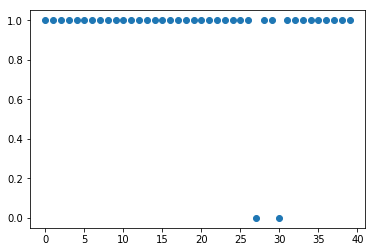

In [140]:
count=[]
for i in range(len(test_data)):
    row = test_data[i]
    output = forward_propagate(network, row)
    if output.index(max(output))==row[-1]:
     #print('True Prediciton')
     count.append(1)
    else:
     #print('False Prediction')
     count.append(0)
plt.plot(count,'o')        
print('Accuracy:',(sum(count)/len(count))*100,'%')